In [1]:
# 1-1. 패키지 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras import layers

print("Tensorflow Version: %s" % tf.__version__)
print("Keras Version: %s" %tf.keras.__version__)

Tensorflow Version: 2.2.0
Keras Version: 2.3.0-tf


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
tf.test.gpu_device_name()
tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
# 2-1. CSV 데이터 읽어오기
import pandas as pd

data = pd.read_csv('C:/Users/tqkqh/Documents/GitHub/Korean_GAN/pre/train/train.csv').astype('float32')
data.head()

,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,...,-1.942,-1.943,-1.944,-1.945,-1.946,-1.947,-1.948,-1.949,-1.950,-1.951
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
# 2-2. 3D Vector 변환

width, height, channel = 32, 32, 1 # 이미지 사이즈 32*32 pixel

X = data.values
X = X.reshape((X.shape[0], width, height, channel))

In [23]:
# 2-3. Image Pixel Normalization [0,255] -> [-1,1] 

X = (X + 127.5) * 127.5 

print(X[0])

[[[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]

 [[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]

 [[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]

 ...

 [[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]

 [[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]

 [[16128.75]
  [16128.75]
  [16128.75]
  ...
  [16128.75]
  [16128.75]
  [16128.75]]]


In [24]:
X[0].shape

(32, 32, 1)

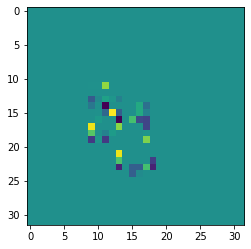

In [25]:
plt.imshow(image)

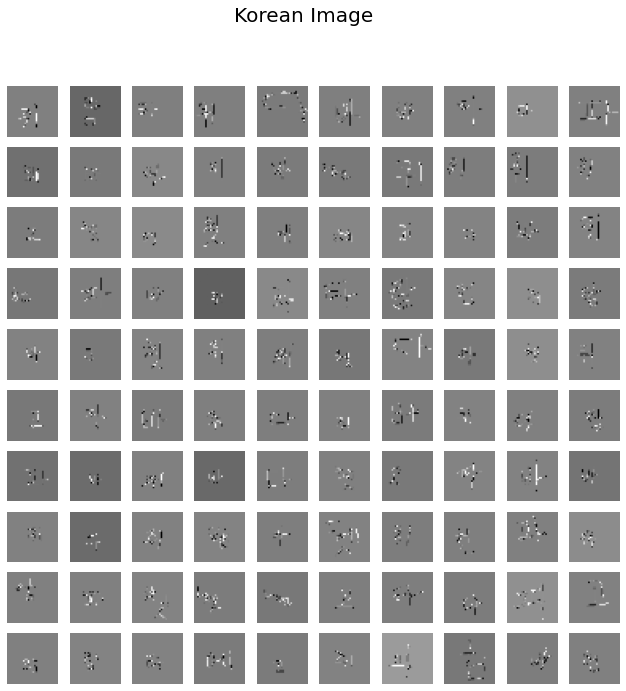

In [26]:
# 2-4. 한글 이미지 시각화
 
plt.figure(figsize=(11,11))
    
i = 1
for image in X:
    plt.subplot(10, 10, i) #(10*10) 총 100칸
    image = image.reshape(width, height)
    plt.imshow(image, cmap='gray') # 흑백 이미지
    plt.axis('off')
    i+=1
    if i > 100: break

plt.suptitle("Korean Image", fontsize = 20)
plt.show()